<a href="https://colab.research.google.com/gist/Larinwa/ac5f1a47bcb62ebed5592c6a9b3e40c5/ba1-py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING AND TOKENIZATION

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("BA_review.csv")

In [ ]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I’ve flown with many airline...
1,1,✅ Trip Verified | I recently flew from New Y...
2,2,Not Verified | BA business class in Europe h...
3,3,✅ Trip Verified | Our flight started in Seattl...
4,4,✅ Trip Verified | British Airways Flight fro...
...,...,...
995,995,✅ Trip Verified | I flew yesterday from Heath...
996,996,✅ Trip Verified | The first part from Brussel...
997,997,✅ Trip Verified | Stockholm to London. Worst ...
998,998,✅ Trip Verified | Seems like no one was aware ...


In [ ]:
df['Trip_Verified'] = df['reviews'].str.contains('Trip Verified', case=False).map({True: 'Yes', False: 'No'})

In [ ]:
df['reviews'] = df['reviews'].str.replace('Trip Verified', '', regex=False)

In [ ]:
import re

df['reviews'] = df['reviews'].str.encode('ascii', 'ignore').str.decode('ascii')


In [ ]:
df['reviews'] = df['reviews'].str.replace('|', '', regex=False)

In [ ]:
df

,Unnamed: 0,reviews,Trip_Verified
0,0,"Ive flown with many airlines, but my recent...",Yes
1,1,I recently flew from New York back to Lon...,Yes
2,2,Not Verified BA business class in Europe has ...,No
3,3,Our flight started in Seattle Wa heading to...,Yes
4,4,British Airways Flight from Edinburgh got...,Yes
...,...,...,...
995,995,I flew yesterday from Heathrow to Manchest...,Yes
996,996,The first part from Brussels to London Hea...,Yes
997,997,Stockholm to London. Worst business class ...,Yes
998,998,Seems like no one was aware of my existence...,Yes


In [ ]:
# Tokenize each review
df['Tokens'] = df['reviews'].apply(word_tokenize)


In [ ]:
# Load data
#df = pd.read_csv('reviews.csv')

# Preprocess text
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

df['reviews'] = df['reviews'].apply(preprocess_text)


In [ ]:
# Create DTM
dictionary = corpora.Dictionary(df['reviews'])
corpus = [dictionary.doc2bow(text) for text in df['reviews']]

In [ ]:
# Train LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, passes=15, num_topics=5)


In [ ]:
# Print topic distributions
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.001*"173" + 0.001*"edreams" + 0.001*"john" + 0.001*"smith" + 0.001*"continued" + 0.001*"rip" + 0.001*"mins" + 0.001*"heading" + 0.001*"writing" + 0.001*"205"')
(1, '0.089*"." + 0.034*"," + 0.023*"flight" + 0.015*"ba" + 0.007*"service" + 0.007*"us" + 0.006*"staff" + 0.005*"hours" + 0.005*"would" + 0.005*"get"')
(2, '0.078*"." + 0.044*"," + 0.015*"class" + 0.013*"business" + 0.012*"flight" + 0.011*"ba" + 0.008*"seat" + 0.008*"food" + 0.008*"service" + 0.008*"good"')
(3, '0.073*"." + 0.067*"," + 0.021*"flight" + 0.011*"ba" + 0.008*"london" + 0.007*"service" + 0.006*"british" + 0.005*"airways" + 0.005*"time" + 0.005*"("')
(4, '0.090*"." + 0.043*"," + 0.015*"flight" + 0.011*"ba" + 0.010*"good" + 0.008*"crew" + 0.008*"food" + 0.007*"seat" + 0.006*")" + 0.006*"service"')


In [ ]:

#Topic 0: Flight Experience
#Topic 1: British Airways Service
#Topic 2: International Travel
#Topic 3: In-Flight Amenities
#Topic 4: Business Travel



topics = lda_model.print_topics()

# Create a dictionary to store labeled topics
labeled_topics = {}

for topic_id, topic_distribution in topics:
    # Analyze topic distribution and assign label
    label = input(f"Label topic {topic_id}: {topic_distribution}: ")
    labeled_topics[topic_id] = label

print(labeled_topics)

Label topic 0: 0.001*"173" + 0.001*"edreams" + 0.001*"john" + 0.001*"smith" + 0.001*"continued" + 0.001*"rip" + 0.001*"mins" + 0.001*"heading" + 0.001*"writing" + 0.001*"205": Topic 0: Flight Experience
Label topic 1: 0.089*"." + 0.034*"," + 0.023*"flight" + 0.015*"ba" + 0.007*"service" + 0.007*"us" + 0.006*"staff" + 0.005*"hours" + 0.005*"would" + 0.005*"get": Topic 1: British Airways Service
Label topic 2: 0.078*"." + 0.044*"," + 0.015*"class" + 0.013*"business" + 0.012*"flight" + 0.011*"ba" + 0.008*"seat" + 0.008*"food" + 0.008*"service" + 0.008*"good": Topic 2: International Travel
Label topic 3: 0.073*"." + 0.067*"," + 0.021*"flight" + 0.011*"ba" + 0.008*"london" + 0.007*"service" + 0.006*"british" + 0.005*"airways" + 0.005*"time" + 0.005*"(": Topic 3: In-Flight Amenities
Label topic 4: 0.090*"." + 0.043*"," + 0.015*"flight" + 0.011*"ba" + 0.010*"good" + 0.008*"crew" + 0.008*"food" + 0.007*"seat" + 0.006*")" + 0.006*"service": Topic 4: Business Travel
{0: 'Topic 0: Flight Experien

In [ ]:
labeled_topics

{0: 'Topic 0: Flight Experience',
 1: 'Topic 1: British Airways Service',
 2: 'Topic 2: International Travel',
 3: 'Topic 3: In-Flight Amenities',
 4: 'Topic 4: Business Travel'}

In [ ]:
import pickle

with open('labeled_topics.pkl', 'wb') as f:
    pickle.dump(labeled_topics, f)


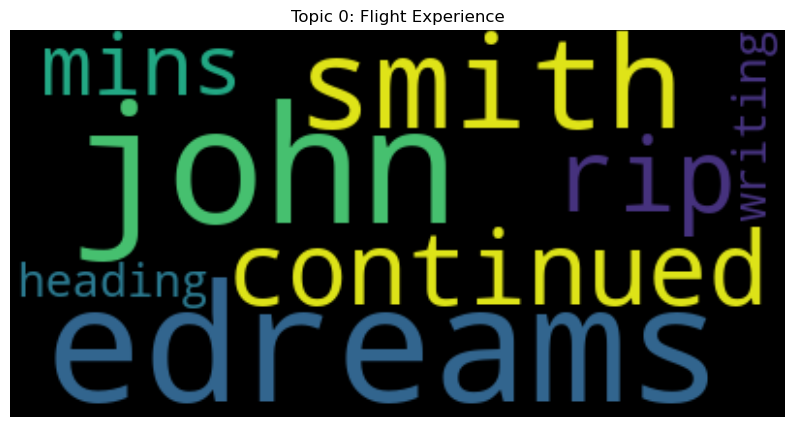

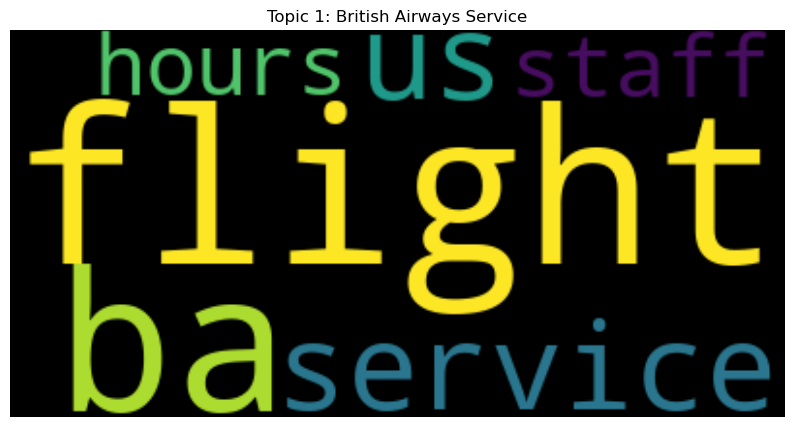

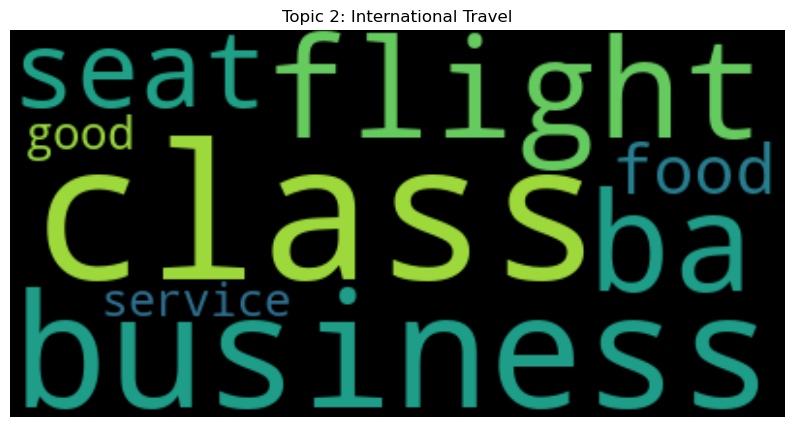

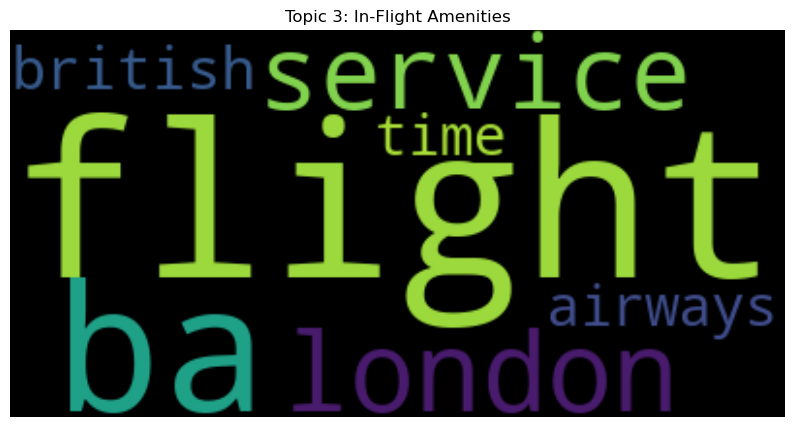

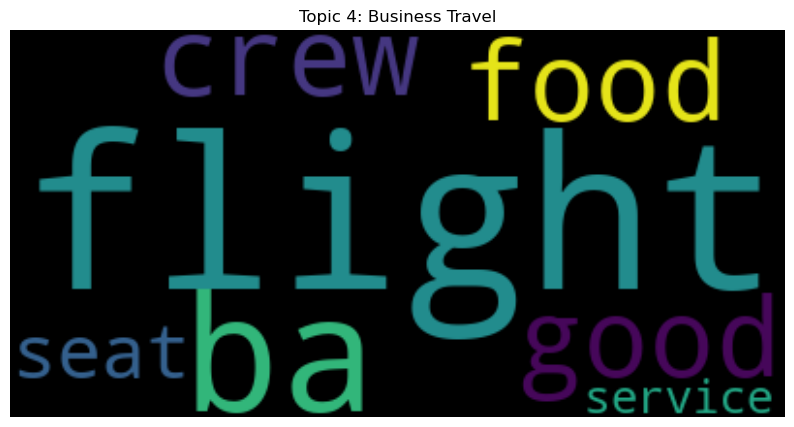

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

topics = lda_model.print_topics()

for topic_id, label in labeled_topics.items():
    topic_distribution = topics[topic_id][1]
    wordcloud = WordCloud().generate(topic_distribution)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(label)
    plt.show()



In [ ]:
import numpy as np
topic_labels_repeated = np.repeat(labeled_topics_df['Topic Label'].values, len(df) // len(labeled_topics_df) + 1)

df['Topic Label'] = topic_labels_repeated[:len(df)]


In [ ]:
# Labeled topics DataFrame
labeled_topics_df = pd.DataFrame(list(labeled_topics.items()), columns=['Topic ID', 'Topic Label'])


# Alternatively, if there's no common column, use concat
df_merged = pd.concat([df, labeled_topics_df], axis=1)



In [ ]:
df.drop(df.columns[-2:], axis=1, inplace=True)


In [ ]:
df_merged

,Unnamed: 0,reviews,Trip_Verified,Tokens,Topic ID,Topic Label
0,0,"[ive, flown, many, airlines, ,, recent, experi...",Yes,"[Ive, flown, with, many, airlines, ,, but, my,...",0.0,Topic 0: Flight Experience
1,1,"[recently, flew, new, york, back, london, ba, ...",Yes,"[I, recently, flew, from, New, York, back, to,...",1.0,Topic 1: British Airways Service
2,2,"[verified, ba, business, class, europe, seat, ...",No,"[Not, Verified, BA, business, class, in, Europ...",2.0,Topic 2: International Travel
3,3,"[flight, started, seattle, wa, heading, lisbon...",Yes,"[Our, flight, started, in, Seattle, Wa, headin...",3.0,Topic 3: In-Flight Amenities
4,4,"[british, airways, flight, edinburgh, got, del...",Yes,"[British, Airways, Flight, from, Edinburgh, go...",4.0,Topic 4: Business Travel
...,...,...,...,...,...,...
995,995,"[flew, yesterday, heathrow, manchester, busine...",Yes,"[I, flew, yesterday, from, Heathrow, to, Manch...",NaN,NaN
996,996,"[first, part, brussels, london, heathrow, fast...",Yes,"[The, first, part, from, Brussels, to, London,...",NaN,NaN
997,997,"[stockholm, london, ., worst, business, class,...",Yes,"[Stockholm, to, London, ., Worst, business, cl...",NaN,NaN
998,998,"[seems, like, one, aware, existence, flight, ....",Yes,"[Seems, like, no, one, was, aware, of, my, exi...",NaN,NaN


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the text column
df['Sentiment'] = df['reviews'].apply(analyze_sentiment)

# Print the updated DataFrame
df.head()

,Unnamed: 0,reviews,Sentiment
0,0,✅ Trip Verified | Appalling service with fai...,Negative
1,1,✅ Trip Verified | British Airways charge you f...,Positive
2,2,✅ Trip Verified | What is wrong with you guys?...,Negative
3,3,✅ Trip Verified | We booked two business cla...,Negative
4,4,✅ Trip Verified | I’ve flown with many airline...,Positive


In [ ]:
df['Trip_Verified'] = df['reviews'].str.contains('Trip Verified', case=False).map({True: 'Yes', False: 'No'})


In [ ]:
ver = df["Trip_Verified"]
ver.value_counts()

Yes    741
No     259
Name: Trip_Verified, dtype: int64

In [ ]:
df

,Unnamed: 0,reviews,Sentiment,Trip_Verified
0,0,| Appalling service with failing defective...,Negative,Yes
1,1,| British Airways charge you for the pleasur...,Positive,Yes
2,2,| What is wrong with you guys? People pay lo...,Negative,Yes
3,3,| We booked two business class seat with B...,Negative,Yes
4,4,"| Ive flown with many airlines, but my recen...",Positive,Yes
...,...,...,...,...
995,995,| Grenada to Gatwick. Having flown with BA ...,Positive,Yes
996,996,| Prague to London. A two hour flight on 27...,Negative,Yes
997,997,| London to Dubai. Lately I am frequently f...,Positive,Yes
998,998,| Tel Aviv to Toronto via London. The plane...,Positive,Yes


In [ ]:
sent= df['Sentiment']
sent.value_counts()

Negative    515
Positive    471
Neutral      14
Name: Sentiment, dtype: int64

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenize each review
df['Tokens'] = df['reviews'].apply(word_tokenize)


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

df['Filtered_Tokens'] = df['Tokens'].apply(lambda x: [token.lower() for token in x if token.lower() not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter

word_freq = Counter(df['Filtered_Tokens'].explode())
print(word_freq)

Counter({'.': 8768, ',': 4542, 'flight': 1969, 'ba': 1300, '|': 990, 'service': 733, 'time': 539, 'london': 479, ')': 463, '(': 459, 'british': 450, 'seat': 446, 'crew': 446, 'class': 444, 'airways': 437, 'food': 429, 'us': 425, 'one': 419, 'good': 416, 'business': 415, 'would': 408, '-': 407, 'get': 398, 'staff': 396, 'seats': 386, "n't": 369, 'hours': 364, 'cabin': 360, '!': 324, 'could': 321, 'back': 316, 'heathrow': 304, 'customer': 304, 'airline': 293, 'told': 286, 'even': 281, 'flights': 280, 'airport': 275, 'check': 270, 'boarding': 266, 'first': 264, 'verified': 263, 'experience': 262, 'plane': 245, 'economy': 243, 'hour': 243, 'passengers': 236, 'cancelled': 225, 'luggage': 225, 'fly': 218, 'club': 216, "'s": 215, 'return': 210, '2': 203, 'got': 202, 'booked': 195, 'never': 195, 'minutes': 195, 'another': 193, 'new': 189, 'day': 188, 'aircraft': 187, 'due': 187, 'still': 184, 'meal': 183, 'also': 183, 'lounge': 183, 'like': 177, 'airlines': 176, 'delayed': 174, 'really': 173, 

In [ ]:
word_to_search = 'cancelled'
observations = df[df['Filtered_Tokens'].apply(lambda x: word_to_search in x)]
print(observations)


     Unnamed: 0  \
0             0   
3             3   
7             7   
13           13   
15           15   
..          ...   
975         975   
977         977   
979         979   
981         981   
990         990   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
for word, freq in sorted(word_freq.most_common(50)):
    print(f"{word}: {freq}")

#print(word_freq.most_common(50))

!: 324
(: 459
): 463
,: 4542
-: 407
.: 8768
airline: 293
airport: 275
airways: 437
ba: 1300
back: 316
boarding: 266
british: 450
business: 415
cabin: 360
cancelled: 225
check: 270
class: 444
could: 321
crew: 446
customer: 304
economy: 243
even: 281
experience: 262
first: 264
flight: 1969
flights: 280
fly: 218
food: 429
get: 398
good: 416
heathrow: 304
hour: 243
hours: 364
london: 479
luggage: 225
n't: 369
one: 419
passengers: 236
plane: 245
seat: 446
seats: 386
service: 733
staff: 396
time: 539
told: 286
us: 425
verified: 263
would: 408
|: 990


In [ ]:
abandon: 1
abandoned: 5

In [ ]:
df



,Unnamed: 0,reviews,Sentiment,Trip_Verified,Tokens,Filtered_Tokens
0,0,| Appalling service with failing defective fleet of A380 aircraft. Flown four times on this route or return and significant delays of 2 to 26 hours every time. BA56 boarded 6:20pm on 13 October. Flight cancelled for technical reasons. Six hours to return through customs and recover bag. No BA management at all at Johannesburg that night. Further four hours to organise a hotel and transfer with queues of 300 people to check in. Room eventually accessed 4:30am No attempt to re-schedule or assist - Pilot trying to announce process.,Negative,Yes,"[|, Appalling, service, with, failing, defective, fleet, of, A380, aircraft, ., Flown, four, times, on, this, route, or, return, and, significant, delays, of, 2, to, 26, hours, every, time, ., BA56, boarded, 6:20pm, on, 13, October, ., Flight, cancelled, for, technical, reasons, ., Six, hours, to, return, through, customs, and, recover, bag, ., No, BA, management, at, all, at, Johannesburg, that, night, ., Further, four, hours, to, organise, a, hotel, and, transfer, with, queues, of, 300, people, to, check, in, ., Room, eventually, accessed, 4:30am, No, attempt, to, re-schedule, or, assist, -, Pilot, trying, to, announce, process, .]","[|, appalling, service, failing, defective, fleet, a380, aircraft, ., flown, four, times, route, return, significant, delays, 2, 26, hours, every, time, ., ba56, boarded, 6:20pm, 13, october, ., flight, cancelled, technical, reasons, ., six, hours, return, customs, recover, bag, ., ba, management, johannesburg, night, ., four, hours, organise, hotel, transfer, queues, 300, people, check, ., room, eventually, accessed, 4:30am, attempt, re-schedule, assist, -, pilot, trying, announce, process, .]"
1,1,"| British Airways charge you for the pleasure of choosing your seat and I had been put at the very back of Club which turned out to be an advantage because it meant I could get to the seat without having to climb over anybody. The seat was clean but as I later discovered that the foldout section would not stay up and your feet dangled over the edge when the bed was extended. After boarding was complete we were told that departure was delayed because BA had not loaded all of the cargo; we were then told that it was delayed further because there was a fault with one of the fuel pumps. It took over five hours for this problem to be corrected as the pilot later informed us that they installed new pump having initially thought that it was a software issue. During that time we were served the meal but were told that alcohol is not permitted which was curious given that we had already been served a pre-departure drink. Most of the cabin crew were male and, apparently, based in Mexico and this turned out to be a pleasant surprise given that those I spoke to were incredibly positive and friendly but seemed embarrassed at what was happening. I knew that it was the old-style seats but what was less acceptable is BAs petty penny pinching. If there was a competition for the smallest hot towel BA would be the winner. The food sounded nice and looked impressive but seemed totally tasteless.",Positive,Yes,"[|, British, Airways, charge, you, for, the, pleasure, of, choosing, your, seat, and, I, had, been, put, at, the, very, back, of, Club, which, turned, out, to, be, an, advantage, because, it, meant, I, could, get, to, the, seat, without, having, to, climb, over, anybody, ., The, seat, was, clean, but, as, I, later, discovered, that, the, foldout, section, would, not, stay, up, and, your, feet, dangled, over, the, edge, when, the, bed, was, extended, ., After, boarding, was, complete, we, were, told, that, departure, was, delayed, because, BA, had, not, loaded, all, of, the, cargo, ;, we, were, then, ...]","[|, british, airways, charge, pleasure, choosing, seat, put, back, club, turned, advantage, meant, could, get, seat, without, climb, anybody, ., seat, clean, later, discovered, foldout, section, would, 

In [ ]:
# Convert text to lowercase
BA_df['reviews'] = BA_df['reviews'].str.lower()

BA_df['reviews'] = BA_df['reviews'].astype(str)  # Convert 'text' column to string data type

BA_df['reviews'] =BA_df['reviews'].apply(nltk.word_tokenize)  # Tokenization

# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
BA_df['reviews'] = BA_df['reviews'].apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
BA_df

,Unnamed: 0,reviews,Sentiment
0,0,[nan],Negative
1,1,[nan],Positive
2,2,[nan],Negative
3,3,[nan],Negative
4,4,[nan],Positive
...,...,...,...
995,995,[nan],Positive
996,996,[nan],Negative
997,997,[nan],Positive
998,998,[nan],Positive
